In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
from cvxopt import matrix, solvers
from numpy import c_
import pandas_datareader as pdr

# 2.4 Numerical Application for Exponential Utility

In [2]:
#Download data
company = ['AAPL', 'GOOGL', 'FB', 'AMZN']
df = pd.DataFrame()

for i in company:
    df[i] = pdr.DataReader(i, data_source='yahoo', start='2020/09/01', end="2021/09/01")['Close']

In [3]:
df.head()

,AAPL,GOOGL,FB,AMZN
Date,,,,
2020-09-01,134.179993,1655.079956,295.440002,3499.120117
2020-09-02,131.399994,1717.390015,302.500000,3531.449951
2020-09-03,120.879997,1629.510010,291.119995,3368.000000
2020-09-04,120.959999,1581.209961,282.730011,3294.620117
2020-09-08,112.820000,1523.599976,271.160004,3149.840088


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-01 to 2021-09-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
 1   GOOGL   253 non-null    float64
 2   FB      253 non-null    float64
 3   AMZN    253 non-null    float64
dtypes: float64(4)
memory usage: 9.9 KB


# Compute Expect Return and Variance

In [5]:
returns = np.log(df / df.shift(1)) #compute log return
returns.fillna(value=0, inplace=True)
returns.head()

,AAPL,GOOGL,FB,AMZN
Date,,,,
2020-09-01,0.000000,0.000000,0.000000,0.000000
2020-09-02,-0.020936,0.036956,0.023615,0.009197
2020-09-03,-0.083448,-0.052526,-0.038346,-0.047389
2020-09-04,0.000662,-0.030089,-0.029243,-0.022028
2020-09-08,-0.069666,-0.037114,-0.041783,-0.044939


In [6]:
means = returns.mean() * 252
covariance = returns.cov() *252

In [7]:
print(means)
print(covariance)

AAPL     0.127542
GOOGL    0.560124
FB       0.256070
AMZN    -0.005744
dtype: float64
           AAPL     GOOGL        FB      AMZN
AAPL   0.097447  0.047372  0.061481  0.062521
GOOGL  0.047372  0.070965  0.058383  0.046372
FB     0.061481  0.058383  0.102010  0.061422
AMZN   0.062521  0.046372  0.061422  0.083245


In [8]:
# transfor to matrix
mean_list = np.array(means)
mean_matrix = matrix(means)
cov_list = np.array(covariance)
cov_matrix = matrix(cov_list)

In [9]:
la = np.linspace(0,0.5,501)
q = matrix(np.zeros((4,1)))
sol = []
A = matrix(np.c_[np.ones(4), mean_matrix]).T
risk = np.linspace(0,0,501)
exp_return = np.linspace(0,0,501)

In [10]:
for i in range(len(la)):
    b = matrix(np.c_[np.ones(1),la[i]]).T
    sol.append(solvers.qp(cov_matrix,q,A=A,b=b)['x'])
    risk[i] = np.sqrt(sol[i].T*cov_matrix*sol[i])
    exp_return[i]=np.matmul(sol[i].T,mean_matrix)

In [11]:
#print(exp_return)

In [12]:
#print(risk)

In [13]:
print(cov_matrix)

[ 9.74e-02  4.74e-02  6.15e-02  6.25e-02]
[ 4.74e-02  7.10e-02  5.84e-02  4.64e-02]
[ 6.15e-02  5.84e-02  1.02e-01  6.14e-02]
[ 6.25e-02  4.64e-02  6.14e-02  8.32e-02]



In [14]:
print(cov_matrix[3,3])

0.08324520232992441


In [15]:
np.sqrt(cov_matrix[0,0])

0.31216547722644095

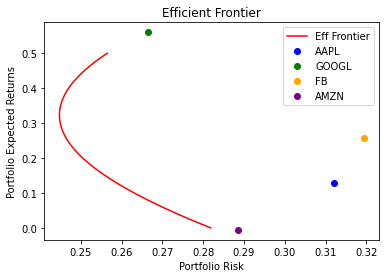

In [16]:
plt.xlabel("Portfolio Risk")
plt.ylabel("Portfolio Expected Returns")
plt.title("Efficient Frontier")
plt.plot(risk,exp_return,color='red',label="Eff Frontier")
plt.plot(np.sqrt(cov_matrix[0,0]), mean_matrix[0], 'ro', color='blue',label='AAPL')
plt.plot(np.sqrt(cov_matrix[1,1]), mean_matrix[1], 'ro', color='green',label='GOOGL')
plt.plot(np.sqrt(cov_matrix[2,2]), mean_matrix[2], 'ro', color='orange',label='FB')
plt.plot(np.sqrt(cov_matrix[3,3]), mean_matrix[3], 'ro', color='purple',label='AMZN')
plt.legend()
plt.show()

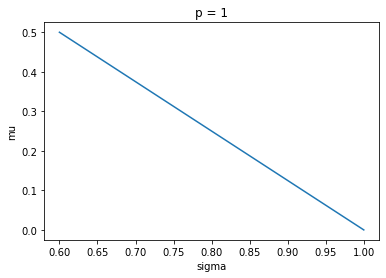

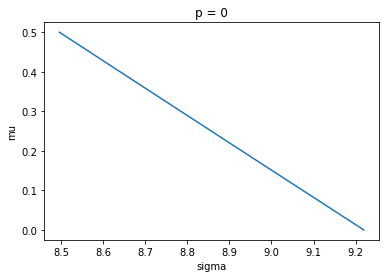

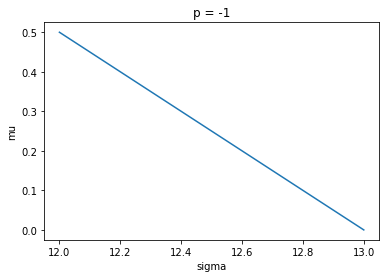

In [17]:
class plotfunction:
    def __init__(self):
        self.mu1_ = 5
        self.sigma1_ = 3
        self.mu2_ = 10
        self.sigma2_ = 7
    
    def function(self, a, b, p):
        mu = np.linspace(a, b, 500)
        w = (mu - self.mu2_) / (self.mu1_ - self.mu2_)
        sigma =np.sqrt(w ** 2 * self.sigma1_ ** 2 + (1 - w) ** 2 * self.sigma2_ ** 2 
                       + 2 * w * (1 - w) * self.sigma1_ * self.sigma2_ * p)
        plt.plot(sigma, mu)
        plt.xlabel("sigma")
        plt.ylabel("mu")
        plt.title('p = ' + str(p))
        #plt.annotate('(%.2f, %.2f)' % (min(sigma), mu[np.argmin(sigma)]),(min(sigma), mu[np.argmin(sigma)]))
        #plt.hlines(mu[np.argmin(sigma)], min(sigma), max(sigma), linestyles = ':')
        #plt.vlines(min(sigma), min(mu), max(mu), linestyles = ':')
        #plt.title(' =' + str())
    
k = plotfunction()
for p in [1,0,-1]:
    k.function(0.0, 0.5, p)
    plt.show()